In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

# Load dataset

In [2]:
file_path = '/kaggle/input/pm2-5-north-vietnam-data/train.csv'
df = pd.read_csv(file_path, parse_dates=['time'])
print(len(df))
df.head()

8055


,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
1,2020-01-01,79,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125


In [3]:
df = df.sort_values(['ID', 'time']).reset_index(drop=True)
df.head(20)

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-02-26,5,54.661429,21.0213,105.8509,4.865087,3.055647,144.053604,22.779993,26.980005,19.119989,0.0000,71.849998,101519.875000
1,2020-02-29,5,25.771250,21.0213,105.8509,4.865087,4.075986,145.028137,23.912493,27.839991,21.299982,0.6250,75.724998,101098.835938
2,2020-03-01,5,28.635652,21.0213,105.8509,4.865087,3.050910,137.656815,24.142496,27.140009,21.619989,0.5000,78.075005,101089.875000
3,2020-03-02,5,21.906667,21.0213,105.8509,4.865087,4.523894,137.026627,24.297499,26.920008,22.879999,0.3750,75.512505,101164.203125
4,2020-03-03,5,13.835625,21.0213,105.8509,4.865087,4.421610,151.275787,24.263742,27.019983,22.529993,2.4375,76.137505,101179.117188
5,2020-03-04,5,16.997222,21.0213,105.8509,4.865087,3.464476,79.480682,20.423742,23.089991,17.290003,20.1875,86.237503,101369.390625
6,2020-03-07,5,28.147500,21.0213,105.8509,4.865087,2.818136,133.328522,23.942495,28.920008,20.529993,0.0000,78.437500,100893.000000
7,2020-03-08,5,37.607917,21.0213,105.8509,4.865087,1.927126,122.793274,26.831251,36.779991,21.429987,0.0000,67.875000,100339.328125
8,2020-03-09,5,58.412917,21.0213,105.8509,4.865087,1.505927,25.097351,28.729998,37.559990,22.589991,0.0000,56.612503,100264.210938
9,2020-03-10,5,45.955500,21.0213,105.8509,4.865087,4.584394,38.001038,22.596247,25.339991,20.749994,0.0000,58.700001,101230.234375


In [4]:
df_dev = pd.read_csv('/kaggle/input/pm2-5-north-vietnam-data/dev.csv', parse_dates=['time'])
df_dev = df_dev.sort_values(['ID', 'time']).reset_index(drop=True)
df_dev.head(20)

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2021-05-11,19,22.132083,21.04975,105.74187,5.922647,3.800925,159.598328,30.950003,37.550011,25.749994,0.0000,68.562500,100172.304688
1,2021-05-12,19,19.387500,21.04975,105.74187,5.922647,3.296794,165.036392,30.725004,37.249992,26.450006,1.9375,70.900002,100213.265625
2,2021-05-13,19,27.319583,21.04975,105.74187,5.922647,3.155174,172.235855,29.850004,36.749992,25.350000,18.5000,76.275002,100239.085938
3,2021-05-14,19,27.685000,21.04975,105.74187,5.922647,4.464500,164.457855,29.812502,35.849998,25.350000,5.6250,73.537498,100224.226562
4,2021-05-15,19,22.887917,21.04975,105.74187,5.922647,5.185781,157.254791,30.662512,36.650017,26.650019,1.0000,72.699997,100247.953125
5,2021-05-16,19,23.107500,21.04975,105.74187,5.922647,3.752593,156.022003,30.675009,37.150017,26.850000,2.0000,74.025002,100301.859375
6,2021-05-17,19,19.771667,21.04975,105.74187,5.922647,4.172164,147.852692,29.337507,33.749992,26.350000,2.8125,79.012497,100466.437500
7,2021-05-18,19,21.192917,21.04975,105.74187,5.922647,4.497660,140.740845,29.110003,33.150017,26.209986,6.3750,80.700005,100423.804688
8,2021-05-19,19,32.344167,21.04975,105.74187,5.922647,4.292573,156.742264,30.875006,37.249992,26.650019,1.8750,73.349998,100160.390625
9,2021-05-20,19,34.087083,21.04975,105.74187,5.922647,3.136582,148.609406,31.225008,37.450005,27.450006,0.0625,71.950005,100138.265625


In [5]:
df_test = pd.read_csv('/kaggle/input/pm2-5-north-vietnam-data/test.csv', parse_dates=['time'])
df_test = df_test.sort_values(['ID', 'time']).reset_index(drop=True)
df_test.head(20)

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2021-07-28,19,20.842500,21.04975,105.74187,5.922647,0.693913,339.214447,31.200006,35.349998,28.550013,5.6875,69.250000,99606.562500
1,2021-07-29,19,33.892500,21.04975,105.74187,5.922647,0.523525,185.343048,30.625010,35.450005,27.350000,4.5625,74.250000,99763.789062
2,2021-07-30,19,36.941667,21.04975,105.74187,5.922647,1.035424,239.131134,31.162508,35.749992,28.050013,1.9375,70.700005,99807.289062
3,2021-07-31,19,27.620833,21.04975,105.74187,5.922647,0.339110,285.829346,31.512503,36.550011,27.950006,2.6875,68.812500,99719.101562
4,2021-08-01,19,16.318571,21.04975,105.74187,5.922647,2.293170,297.920013,26.387503,27.950006,24.950006,16.7500,88.875000,99834.156250
5,2021-08-02,19,22.803333,21.04975,105.74187,5.922647,1.376523,294.633423,29.887506,36.150017,25.550013,0.0000,73.775002,99748.171875
6,2021-08-03,19,32.608261,21.04975,105.74187,5.922647,1.459764,311.250549,31.087507,37.150017,26.050013,3.3750,68.237503,99822.500000
7,2021-08-04,19,43.097917,21.04975,105.74187,5.922647,1.460672,320.834778,30.675005,36.749992,25.550013,1.8750,68.887505,99875.187500
8,2021-08-05,19,36.074167,21.04975,105.74187,5.922647,1.300804,274.795654,32.500000,38.050011,27.950006,0.0000,60.799999,99661.765625
9,2021-08-06,19,41.297083,21.04975,105.74187,5.922647,1.026049,276.224579,32.912506,38.249992,28.749994,0.0000,58.100002,99715.000000


In [6]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn
    
def add_season_features(dataframe):
    # Convert month to season
    dataframe['season'] = dataframe['time'].dt.month.apply(month_to_season)
    
    # Create one-hot encoding with all possible seasons
    all_seasons = [0, 1, 2, 3]  # Winter, Spring, Summer, Autumn
    for season in all_seasons:
        dataframe[f'season_{season}'] = (dataframe['season'] == season).astype(int)
    
    # Drop original season column
    dataframe.drop(columns=['season'], inplace=True)
    
    return dataframe

In [7]:
def engineering_features(df):
    df['time'] = pd.to_datetime(df['time'])
    df['month'] = df['time'].dt.month

    df = add_season_features(df)

    df['pm25_lag1'] = np.log1p(df['pm25'].shift(1))
    df['pm25_lag2'] = np.log1p(df['pm25'].shift(2))
    df['pm25_lag3'] = np.log1p(df['pm25'].shift(3))

    df['pm25_roll_mean_2'] = df["pm25"].shift(1).rolling(window=2).mean()
    df["pm25_roll_std_2"] = df["pm25"].shift(1).rolling(window=2).std()
    df["pm25_roll_mean_3"] = df["pm25"].shift(1).rolling(window=3).mean()
    df["pm25_roll_std_3"] = df["pm25"].shift(1).rolling(window=3).std()
    df["pm25_roll_mean_7"] = df["pm25"].shift(1).rolling(window=7).mean()
    df["pm25_roll_std_7"] = df["pm25"].shift(1).rolling(window=7).std()

    # 4. Xử lý NaN
    df = df.dropna().reset_index(drop=True)

    df['pm25'] = np.log1p(df['pm25'])

    return df

In [8]:
df = engineering_features(df)
df_dev = engineering_features(df_dev)
df_test = engineering_features(df_test)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result 

In [9]:
df.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,season_3,pm25_lag1,pm25_lag2,pm25_lag3,pm25_roll_mean_2,pm25_roll_std_2,pm25_roll_mean_3,pm25_roll_std_3,pm25_roll_mean_7,pm25_roll_std_7
0,2020-03-08,5,3.653457,21.0213,105.8509,4.865087,1.927126,122.793274,26.831251,36.779991,...,0,3.372369,2.890217,2.697031,22.572361,7.884437,19.660116,7.518357,27.136478,13.353056
1,2020-03-09,5,4.084512,21.0213,105.8509,4.865087,1.505927,25.097351,28.729998,37.559990,...,0,3.653457,3.372369,2.890217,32.877708,6.689525,27.584213,10.316887,24.700262,7.961435
2,2020-03-10,5,3.849200,21.0213,105.8509,4.865087,4.584394,38.001038,22.596247,25.339991,...,0,4.084512,3.653457,3.372369,48.010417,14.711357,41.389444,15.483017,29.363357,15.074767
3,2020-03-11,5,3.737590,21.0213,105.8509,4.865087,2.152299,122.573273,22.202501,25.179987,...,0,3.849200,4.084512,3.653457,52.184208,8.808724,47.325444,10.469936,31.837621,16.306478
4,2020-03-12,5,3.468674,21.0213,105.8509,4.865087,3.181127,136.926666,24.868746,30.079981,...,0,3.737590,3.849200,4.084512,43.476083,3.506425,48.455028,8.973136,34.564764,15.961466


In [10]:
df_dev.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,season_3,pm25_lag1,pm25_lag2,pm25_lag3,pm25_roll_mean_2,pm25_roll_std_2,pm25_roll_mean_3,pm25_roll_std_3,pm25_roll_mean_7,pm25_roll_std_7
0,2021-05-18,19,3.099773,21.04975,105.74187,5.922647,4.497660,140.740845,29.110003,33.150017,...,0,3.033590,3.182523,3.173373,21.439583,2.358790,21.922361,1.865789,23.184464,3.281756
1,2021-05-19,19,3.506883,21.04975,105.74187,5.922647,4.292573,156.742264,30.875006,37.249992,...,0,3.099773,3.033590,3.182523,20.482292,1.004976,21.357361,1.673986,23.050298,3.350430
2,2021-05-20,19,3.557833,21.04975,105.74187,5.922647,3.136582,148.609406,31.225008,37.450005,...,0,3.506883,3.099773,3.033590,26.768542,7.885124,24.436250,6.885227,24.901250,4.403219
3,2021-05-21,19,3.530750,21.04975,105.74187,5.922647,3.850364,150.089020,31.887506,38.650017,...,0,3.557833,3.506883,3.099773,33.215625,1.232428,29.208056,6.995804,25.868036,5.602358
4,2021-05-22,19,3.686877,21.04975,105.74187,5.922647,4.198125,152.168365,32.387501,38.849998,...,0,3.530750,3.557833,3.506883,33.618333,0.662913,33.193611,0.872292,26.648690,6.241956


In [11]:
df_test.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,season_3,pm25_lag1,pm25_lag2,pm25_lag3,pm25_roll_mean_2,pm25_roll_std_2,pm25_roll_mean_3,pm25_roll_std_3,pm25_roll_mean_7,pm25_roll_std_7
0,2021-08-04,19,3.786413,21.04975,105.74187,5.922647,1.460672,320.834778,30.675005,36.749992,...,0,3.514772,3.169826,2.851779,27.705797,6.933131,23.910055,8.201044,27.289667,7.607164
1,2021-08-05,19,3.612920,21.04975,105.74187,5.922647,1.300804,274.795654,32.500000,38.050011,...,0,3.786413,3.514772,3.169826,37.853089,7.417307,32.836504,10.149217,30.469012,8.988797
2,2021-08-06,19,3.744718,21.04975,105.74187,5.922647,1.026049,276.224579,32.912506,38.249992,...,0,3.612920,3.786413,3.514772,39.586042,4.966541,37.260115,5.344443,30.780678,9.163409
3,2021-08-07,19,3.138056,21.04975,105.74187,5.922647,0.378634,200.888123,32.312504,37.450005,...,0,3.744718,3.612920,3.786413,38.685625,3.693160,40.156389,3.648171,31.402881,9.778680
4,2021-08-08,19,3.712138,21.04975,105.74187,5.922647,0.552407,147.568588,32.800003,37.550011,...,0,3.138056,3.744718,3.612920,31.678042,13.603379,33.143417,9.948263,30.608333,10.346662


# Compute correlation and create scenarios

In [12]:
def compute_correlation(df, target='pm25'):
    correlations = []
    for col in df.columns:
        if col not in ['index', 'time', 'ID', target]:
            corr = df[col].corr(df[target])
            correlations.append((col, corr))
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    return correlations

In [13]:
correlations = compute_correlation(df)
for col, r in correlations:
    print(f'{col:20s} -> Pearson r = {r:.3f}')

pm25_lag1            -> Pearson r = 0.826
pm25_roll_mean_2     -> Pearson r = 0.689
pm25_lag2            -> Pearson r = 0.666
pm25_roll_mean_3     -> Pearson r = 0.660
pm25_roll_mean_7     -> Pearson r = 0.618
pm25_lag3            -> Pearson r = 0.586
pm25_roll_std_7      -> Pearson r = 0.517
pm25_roll_std_3      -> Pearson r = 0.450
PRES2M               -> Pearson r = 0.399
pm25_roll_std_2      -> Pearson r = 0.388
season_0             -> Pearson r = 0.386
TN                   -> Pearson r = -0.347
TP                   -> Pearson r = -0.343
season_2             -> Pearson r = -0.303
TMP                  -> Pearson r = -0.295
WSPD                 -> Pearson r = -0.271
RH                   -> Pearson r = -0.259
TX                   -> Pearson r = -0.228
month                -> Pearson r = -0.222
lon                  -> Pearson r = -0.163
SQRT_SEA_DEM_LAT     -> Pearson r = 0.149
season_3             -> Pearson r = -0.148
lat                  -> Pearson r = -0.030
season_1             ->

# Create sequence for LSTM

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

features = [
    'PRES2M', 'TN', 'TMP', 'WSPD', 'TX', 'TP', 'RH', 'SQRT_SEA_DEM_LAT', 'WDIR', 'lat', 'lon',
    
    'month', 'season_0', 'season_1', 'season_2', 'season_3',
    
    'pm25_lag1', 'pm25_lag2', 'pm25_lag3',
    
    'pm25_roll_mean_2','pm25_roll_mean_3', 'pm25_roll_mean_7', 'pm25_roll_std_2', 'pm25_roll_std_3', 'pm25_roll_std_7'
]

target = 'pm25'

df[features] = scaler_X.fit_transform(df[features])
df[target] = scaler_y.fit_transform(df[[target]])

df.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,season_3,pm25_lag1,pm25_lag2,pm25_lag3,pm25_roll_mean_2,pm25_roll_std_2,pm25_roll_mean_3,pm25_roll_std_3,pm25_roll_mean_7,pm25_roll_std_7
0,2020-03-08,5,0.294824,-0.934447,-0.734654,-0.722673,-0.743216,-0.007030,0.620298,1.513371,...,-0.492105,-0.094333,-0.761683,-1.028986,-0.560229,-0.077336,-0.688823,-0.313794,-0.487211,-0.170106
1,2020-03-09,5,0.891602,-0.934447,-0.734654,-0.722673,-1.065719,-1.290476,0.996158,1.643054,...,-0.492105,0.294823,-0.094177,-0.761549,-0.214256,-0.186446,-0.410318,-0.075691,-0.585126,-0.569304
2,2020-03-10,5,0.565823,-0.934447,-0.734654,-0.722673,1.291398,-1.120959,-0.218027,-0.388648,...,-0.492105,0.891601,0.294971,-0.094082,0.293782,0.546044,0.074888,0.363850,-0.397709,-0.042630
3,2020-03-11,5,0.411303,-0.934447,-0.734654,-0.722673,-0.570806,-0.009921,-0.295970,-0.415250,...,-0.492105,0.565821,0.891736,0.295042,0.433906,0.007063,0.283518,-0.062670,-0.298265,0.048566
4,2020-03-12,5,0.038999,-0.934447,-0.734654,-0.722673,0.216946,0.178642,0.231817,0.399425,...,-0.492105,0.411301,0.565963,0.891771,0.141555,-0.477101,0.323219,-0.190020,-0.188657,0.023021


In [15]:
df_dev[features] = scaler_X.transform(df_dev[features])
df_dev[target] = scaler_y.transform(df_dev[[target]])

df_dev.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,season_3,pm25_lag1,pm25_lag2,pm25_lag3,pm25_roll_mean_2,pm25_roll_std_2,pm25_roll_mean_3,pm25_roll_std_3,pm25_roll_mean_7,pm25_roll_std_7
0,2021-05-18,19,-0.471730,-0.591933,-1.19749,0.97523,1.224987,0.228749,1.071381,0.909850,...,-0.492105,-0.563360,-0.357006,-0.369563,-0.598259,-0.581894,-0.609313,-0.794723,-0.646048,-0.915789
1,2021-05-19,19,0.091898,-0.591933,-1.19749,0.97523,1.067957,0.438962,1.420766,1.591514,...,-0.492105,-0.471732,-0.563193,-0.356896,-0.630397,-0.705514,-0.629171,-0.811042,-0.651440,-0.910704
2,2021-05-20,19,0.162436,-0.591933,-1.19749,0.97523,0.182839,0.332120,1.490049,1.624768,...,-0.492105,0.091896,-0.471567,-0.563071,-0.419354,-0.077273,-0.520958,-0.367662,-0.577048,-0.832755
3,2021-05-21,19,0.124941,-0.591933,-1.19749,0.97523,0.729367,0.351558,1.621192,1.824282,...,-0.492105,0.162434,0.092048,-0.471450,-0.202911,-0.684744,-0.353246,-0.358254,-0.538191,-0.743970
4,2021-05-22,19,0.341093,-0.591933,-1.19749,0.97523,0.995640,0.378875,1.720166,1.857531,...,-0.492105,0.124940,0.162585,0.092131,-0.189391,-0.736748,-0.213167,-0.879251,-0.506815,-0.696614


In [16]:
df_test[features] = scaler_X.transform(df_test[features])
df_test[target] = scaler_y.transform(df_test[[target]])

df_test.head()

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,season_3,pm25_lag1,pm25_lag2,pm25_lag3,pm25_roll_mean_2,pm25_roll_std_2,pm25_roll_mean_3,pm25_roll_std_3,pm25_roll_mean_7,pm25_roll_std_7
0,2021-08-04,19,0.478896,-0.591933,-1.19749,0.97523,-1.100370,2.594670,1.381175,1.508384,...,-0.492105,0.102818,-0.374584,-0.814760,-0.387888,-0.164201,-0.539452,-0.255710,-0.481054,-0.595534
1,2021-08-05,19,0.238703,-0.591933,-1.19749,0.97523,-1.222778,1.989847,1.742436,1.724525,...,-0.492105,0.478894,0.102970,-0.374473,-0.047221,-0.119990,-0.225718,-0.089957,-0.353271,-0.493237
2,2021-08-06,19,0.421171,-0.591933,-1.19749,0.97523,-1.433152,2.008619,1.824092,1.757774,...,-0.492105,0.238701,0.479038,0.103053,0.010958,-0.343775,-0.070243,-0.498754,-0.340745,-0.480309
3,2021-08-07,19,-0.418729,-0.591933,-1.19749,0.97523,-1.928864,1.018913,1.705321,1.624768,...,-0.492105,0.421170,0.238850,0.479098,-0.019271,-0.460050,0.031551,-0.643075,-0.315738,-0.434754
4,2021-08-08,19,0.376066,-0.591933,-1.19749,0.97523,-1.795810,0.318447,1.801822,1.641395,...,-0.492105,-0.418730,0.421315,0.238924,-0.254531,0.444873,-0.214931,-0.107054,-0.347672,-0.392701


In [17]:
from torch.utils.data import Dataset, DataLoader

class SequenceDataset(Dataset):
    def __init__(self, data, features, target='pm25', sequence_length=7, n_future=1):
        self.X = []
        self.y = []
        grouped = data.groupby('ID')

        for _, group in grouped:
            group = group.sort_values('time').reset_index(drop=True)
            values = group[features + [target]].values

            for i in range(sequence_length, len(values) - n_future + 1):
                self.X.append(values[i-sequence_length:i, :-1])
                self.y.append(values[i:i+n_future, -1])

        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model construction

In [18]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, dropout, num_layers, n_future=1):
        super(LSTMModel, self).__init__()

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0  # PyTorch chỉ apply dropout nếu num_layers > 1
        )

        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, n_future)
        )

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = lstm_out[:, -1, :]
        out = self.fc(x)
        return out

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_future = 1
sequence_length = 4
batch_size = 32
hidden_size = 64
dropout = 0.1
num_layers = 1

data_train = SequenceDataset(df, features, target=target, sequence_length=sequence_length)
loader_train = DataLoader(data_train, batch_size=batch_size, shuffle=True)

data_dev = SequenceDataset(df_dev, features, target=target, sequence_length=sequence_length)
loader_dev = DataLoader(data_dev, batch_size=batch_size, shuffle=False)

data_test = SequenceDataset(df_test, features, target=target, sequence_length=sequence_length)
loader_test = DataLoader(data_test, batch_size=batch_size, shuffle=False)

model = LSTMModel(input_size=len(features), hidden_size=hidden_size, dropout=dropout, num_layers=num_layers).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

/tmp/ipykernel_19/3180751654.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  self.X = torch.tensor(self.X, dtype=torch.float32)


In [20]:
epochs = 50
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(epochs):
    model.train()
    
    total_loss = 0
    
    for x_batch, y_batch in loader_train:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}: Loss = {total_loss/len(loader_train):.4f}")
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in loader_dev:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            val_loss += loss_fn(y_pred, y_batch).item()
    
    val_loss = val_loss/len(loader_dev)
    print(f"Validation Loss: {val_loss:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pt')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

Epoch 1/50: Loss = 0.5157
Validation Loss: 0.3409
Epoch 2/50: Loss = 0.3359
Validation Loss: 0.3325
Epoch 3/50: Loss = 0.2928
Validation Loss: 0.3135
Epoch 4/50: Loss = 0.2705
Validation Loss: 0.3102
Epoch 5/50: Loss = 0.2535
Validation Loss: 0.3002
Epoch 6/50: Loss = 0.2388
Validation Loss: 0.3023
Epoch 7/50: Loss = 0.2271
Validation Loss: 0.3245
Epoch 8/50: Loss = 0.2147
Validation Loss: 0.3421
Epoch 9/50: Loss = 0.2085
Validation Loss: 0.3123
Epoch 10/50: Loss = 0.1987
Validation Loss: 0.3322
Early stopping


In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr

def get_scores(model, loader):
    model.eval()
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            y_pred.extend(outputs.cpu().numpy())
            y_true.extend(y_batch.numpy())
    
    y_true_inv = np.expm1(scaler_y.inverse_transform(np.array(y_true).reshape(-1, 1)))
    y_pred_inv = np.expm1(scaler_y.inverse_transform(np.array(y_pred).reshape(-1, 1)))
    
    rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    r2 = r2_score(y_true_inv, y_pred_inv)
    r, _ = pearsonr(np.array(y_true_inv).flatten(), np.array(y_pred_inv).flatten())
    
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2: {r2:.4f}")
    print(f"Pearson r: {r:.4f}")

    return y_true_inv, y_pred_inv

In [22]:
import matplotlib.pyplot as plt

def plot(y_true_inv, y_pred_inv):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true_inv, label='Actual')
    plt.plot(y_pred_inv, label='Predicted')
    plt.title('Actual vs Predicted PM2.5 by LSTM')
    plt.xlabel('Days')
    plt.ylabel('PM2.5')
    plt.legend()
    plt.show()

RMSE: 14.2218
MAE: 8.7711
R2: 0.7947
Pearson r: 0.8970


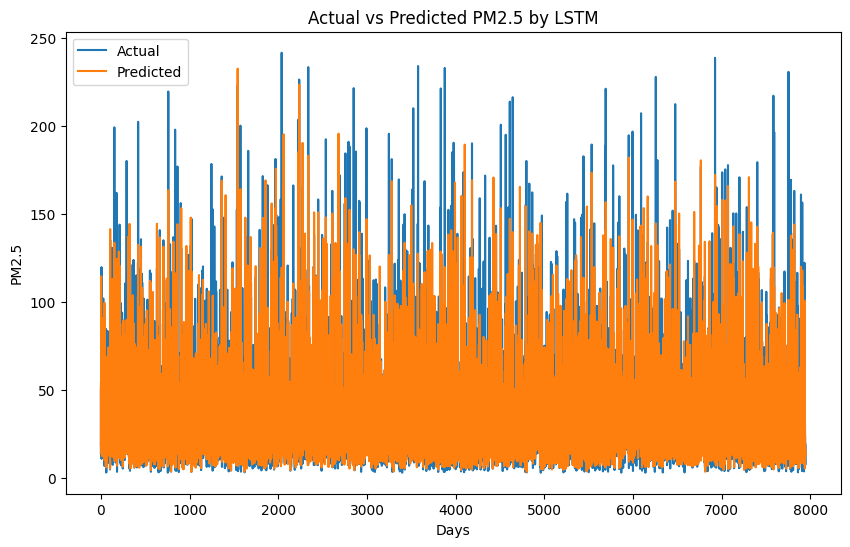

In [23]:
# train test
y_true_inv, y_pred_inv = get_scores(model, loader_train)
plot(y_true_inv, y_pred_inv)

RMSE: 12.3481
MAE: 7.7688
R2: 0.3619
Pearson r: 0.6045


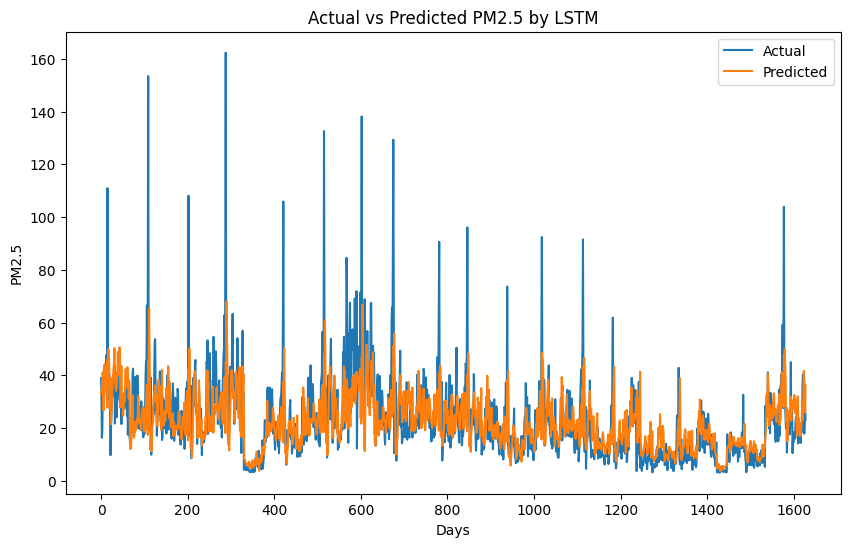

In [24]:
# dev test
y_true_inv, y_pred_inv = get_scores(model, loader_dev)
plot(y_true_inv, y_pred_inv)

RMSE: 15.8390
MAE: 10.6335
R2: 0.6532
Pearson r: 0.8093


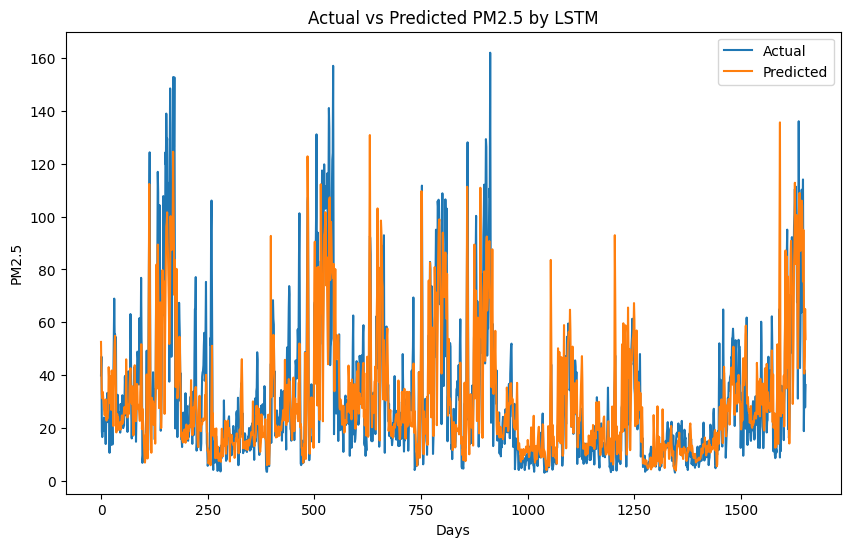

In [25]:
# test test
y_true_inv, y_pred_inv = get_scores(model, loader_test)
plot(y_true_inv, y_pred_inv)

# Multi-step

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_future = 3
sequence_length = 4
batch_size = 32
hidden_size = 64
dropout = 0.1
num_layers = 1

data_train = SequenceDataset(df, features, target=target, sequence_length=sequence_length, n_future=n_future)
loader_train = DataLoader(data_train, batch_size=batch_size, shuffle=True)

data_dev = SequenceDataset(df_dev, features, target=target, sequence_length=sequence_length, n_future=n_future)
loader_dev = DataLoader(data_dev, batch_size=batch_size, shuffle=False)

data_test = SequenceDataset(df_test, features, target=target, sequence_length=sequence_length, n_future=n_future)
loader_test = DataLoader(data_test, batch_size=batch_size, shuffle=False)

model = LSTMModel(input_size=len(features), hidden_size=hidden_size, dropout=dropout, num_layers=num_layers, n_future=n_future).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

In [27]:
epochs = 50
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(epochs):
    model.train()
    
    total_loss = 0
    
    for x_batch, y_batch in loader_train:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}: Loss = {total_loss/len(loader_train):.4f}")
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in loader_dev:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = model(x_batch)
            val_loss += loss_fn(y_pred, y_batch).item()
    
    val_loss = val_loss/len(loader_dev)
    print(f"Validation Loss: {val_loss:.4f}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pt')
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

Epoch 1/50: Loss = 0.5780
Validation Loss: 0.3657
Epoch 2/50: Loss = 0.4050
Validation Loss: 0.3433
Epoch 3/50: Loss = 0.3641
Validation Loss: 0.3632
Epoch 4/50: Loss = 0.3347
Validation Loss: 0.3287
Epoch 5/50: Loss = 0.3136
Validation Loss: 0.3552
Epoch 6/50: Loss = 0.2944
Validation Loss: 0.3534
Epoch 7/50: Loss = 0.2814
Validation Loss: 0.3592
Epoch 8/50: Loss = 0.2694
Validation Loss: 0.3606
Epoch 9/50: Loss = 0.2600
Validation Loss: 0.3648
Early stopping


RMSE: 15.6137
MAE: 9.9812
R2: 0.7532
Pearson r: 0.8736


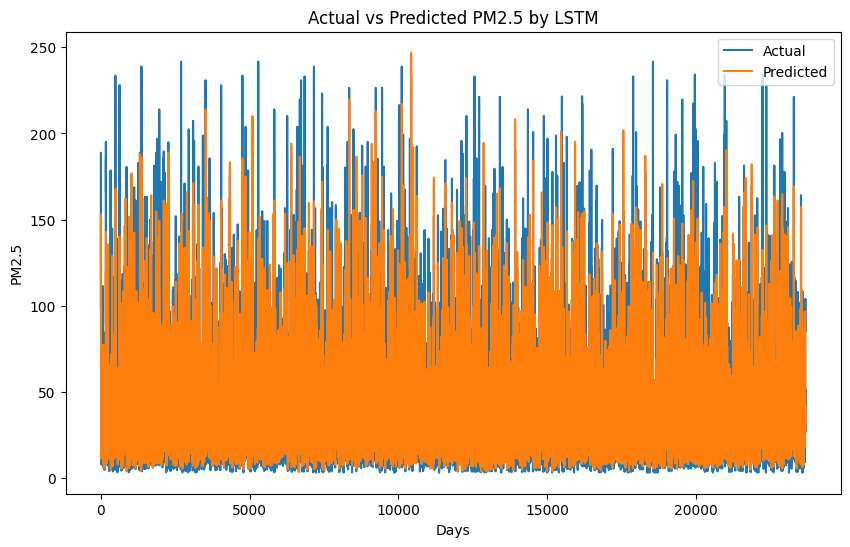

In [28]:
# train test
y_true_inv, y_pred_inv = get_scores(model, loader_train)
plot(y_true_inv, y_pred_inv)

RMSE: 12.8812
MAE: 8.1965
R2: 0.3092
Pearson r: 0.5607


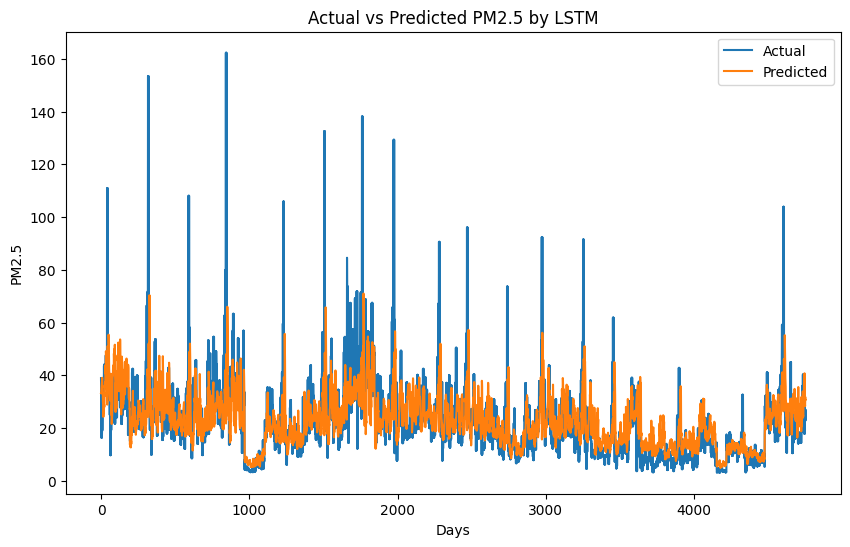

In [29]:
# dev test
y_true_inv, y_pred_inv = get_scores(model, loader_dev)
plot(y_true_inv, y_pred_inv)

RMSE: 18.1883
MAE: 12.0911
R2: 0.5476
Pearson r: 0.7437


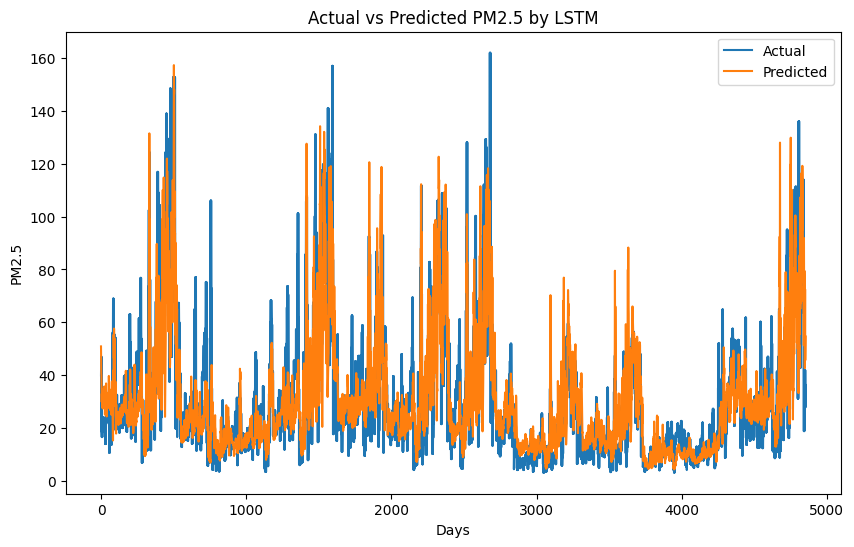

In [30]:
# test test
y_true_inv, y_pred_inv = get_scores(model, loader_test)
plot(y_true_inv, y_pred_inv)